# Clustering using heart diseases as an example (or why you shouldn't classify using clustering algorithms)
The initial thought of this workbook was the following: As Chicco and Jurman (2020) initially proposed that the survival of heart failure can be predicted by serum creatinine and ejection fraction alone, a GMM clustering algorithm using those two features only should achieve similar levels for the evaluation metrics. This was actually the case, but when I visualised the example, i frowned as it didn't make sense anymore. After some research, it became obvious - my thoughts of classifying using clustering algorithms is inherently and logically false (For my defense I have to say I did this in the very early stages of my machine learning course). However as the workbook and visualisations were quite cool, I still decided to upload and share my mistake. Maybe you learn something out of this rookie mistake as well ;) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Information on data set:
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#

Abstract: This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.

A detailed description of the dataset can be found in the Dataset section of the following paper:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020). [Web Link]

Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

For more information, please check Table 1, Table 2, and Table 3 of the following paper:

Davide Chicco, Giuseppe Jurman: "[Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)". BMC Medical Informatics and Decision Making 20, 16 (2020). 

Original dataset version:

Tanvir Ahmad, Assia Munir, Sajjad Haider Bhatti, Muhammad Aftab, and Muhammad Ali Raza: "Survival analysis of heart failure patients: a case study". PLoS ONE 12(7), 0181001 (2017).

Current dataset version on the UCI ML Repository:

Davide Chicco, Giuseppe Jurman: "Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone". BMC Medical Informatics and Decision Making 20, 16 (2020).

# A bit of Data Preprocessing

In [5]:
#After a quick check of the data set, a strange repeating value for platelets is found:
print(pd.value_counts(data["platelets"]))

263358.03    25
221000.00     4
279000.00     4
271000.00     4
305000.00     4
             ..
227000.00     1
289000.00     1
300000.00     1
217000.00     1
742000.00     1
Name: platelets, Length: 176, dtype: int64


Although the value itself is not an outlier, the exactness - compared to the other observations - and the fact that it appears at high frequency is suspicious. Looking at the countplot of the data visualizes the observation of before and proposes some reasoning: as this mode is in the center of values, it seems like those were initially N/A-values which were replaced by the mean. 

<AxesSubplot:xlabel='platelets', ylabel='count'>

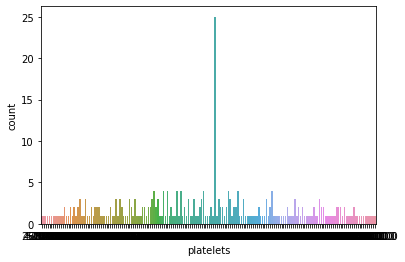

In [5]:
sns.countplot(data = data, x = 'platelets')

# Clustering with Two Features
As clustering algorithm, a Gaussian Mixture Model is established.

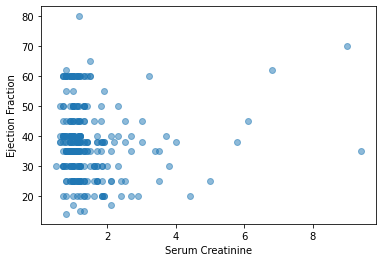

In [12]:
X = data[["serum_creatinine","ejection_fraction"]]
plt.scatter(x=X["serum_creatinine"],y=X["ejection_fraction"],alpha = 0.5)
plt.xlabel("Serum Creatinine")
plt.ylabel("Ejection Fraction")
plt.show()

In [13]:
#Fit the data as a mixture of 2 Gaussians
gmm = GaussianMixture(n_components = 2, n_init=200)
gmm.fit(X.values)

GaussianMixture(n_components=2, n_init=200)

In [15]:
#predict the cluster of each data record
labels2 = gmm.predict(X)

In [16]:
#Check if model has converged
print("Converged:",gmm.converged_,", after ",gmm.n_iter_,"iterations.")

Converged: True , after  15 iterations.


In [17]:
#get the final means for each cluster 
means = gmm.means_
means

array([[ 1.04927336, 39.4039707 ],
       [ 2.55982781, 33.61628202]])

In [18]:
#get the final "standard deviations", the covariance matrix, for each cluster 
cov = gmm.covariances_
cov

array([[[ 5.52485740e-02, -2.19295652e-01],
        [-2.19295652e-01,  1.37739777e+02]],

       [[ 2.72734368e+00,  6.88556937e+00],
        [ 6.88556937e+00,  1.20016559e+02]]])

In [19]:
#plot the data records in different color
X["labels2"] = labels2
data["labels2"] = labels2
X0 = X[X["labels2"] == 0]
X1 = X[X["labels2"] == 1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


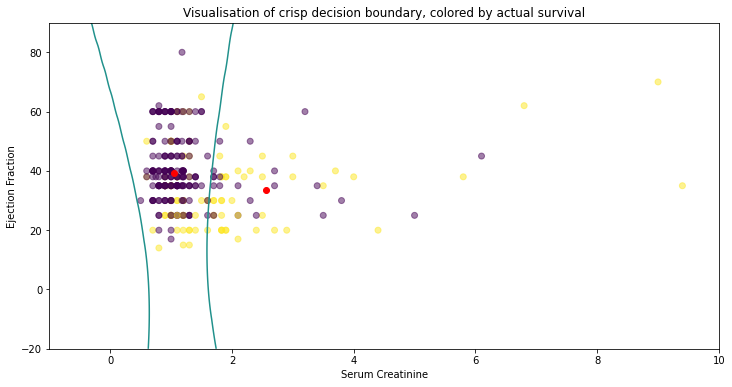

In [30]:
#Calculation of crisp decision boundary
def g1(x, y):
    return gmm.predict_proba(np.column_stack((x, y)))[:, 0]

def g2(x, y):
    return gmm.predict_proba(np.column_stack((x, y)))[:, 1]

A, B = np.mgrid[-1:10:100j, -20:90:100j]
a = A.ravel()
b = B.ravel()

p = (g1(a, b) - g2(a, b)).reshape(A.shape)


#Visualization
fig, ax = plt.subplots(figsize=(12, 6))

#Add predicted scatter axes
#This is basically resembled by the decision boundary, so th
#ax.scatter(X0["serum_creatinine"],X0["ejection_fraction"], c = 'r', alpha = 0.5)
#ax.scatter(X1["serum_creatinine"],X1["ejection_fraction"], c='g', alpha = 0.5)

#Add true scatter axes
ax.scatter(X["serum_creatinine"],X["ejection_fraction"], c = data["DEATH_EVENT"], alpha = 0.5)
ax.scatter(means.T[0],means.T[1], c="r")


plt.contour(A,B,p, levels=0)
plt.xlabel("Serum Creatinine")
plt.ylabel("Ejection Fraction")
#plt.xlim([0, 4])
plt.title("Visualisation of crisp decision boundary, colored by actual survival")
plt.show()

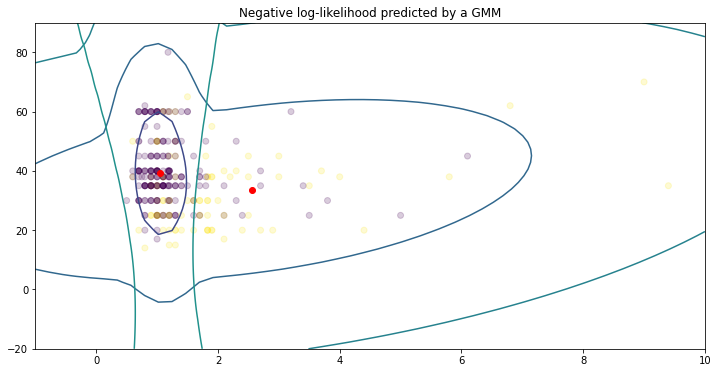

In [32]:
#Extended contour plot

from matplotlib.colors import LogNorm

# display predicted scores by the model as a contour plot
h = np.linspace(-1., 10)
j = np.linspace(-20., 90.)
H, J = np.meshgrid(h, j)
HH = np.array([H.ravel(), J.ravel()]).T
K = -gmm.score_samples(HH)
K = K.reshape(H.shape)

plt.subplots(figsize=(12, 6))
CS = plt.contour(H, J, K, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels= np.logspace(0, 3, 10))
plt.contour(A,B,p, levels=0)
plt.scatter(X["serum_creatinine"],X["ejection_fraction"], c = data["DEATH_EVENT"], alpha = 0.2)
plt.scatter(means.T[0],means.T[1], c="r")

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [33]:
gmm.predict_proba([[0.1,35]])


array([[0.01826552, 0.98173448]])

We see that a sample point at y=35 and x=0.1 indeed is categorized as belonging to the second cluster with mean at [ 2.55982781, 33.61628202].

This is the outcome of the GMM clustering, suggesting a quite horizontal decision boundary.

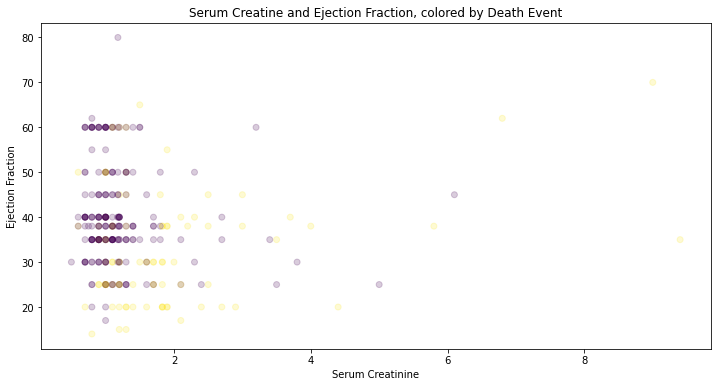

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=data["serum_creatinine"],y=data["ejection_fraction"], c = data["DEATH_EVENT"],alpha = 0.2)
plt.xlabel("Serum Creatinine")
plt.ylabel("Ejection Fraction")
plt.title("Serum Creatine and Ejection Fraction, colored by Death Event")
#plt.legend(handles = plt.scatter(x=data["serum_creatinine"],y=data["ejection_fraction"], c = data["DEATH_EVENT"]).legend_elements()[0], labels = ["Death","Survived"])
plt.show()

Looking at the real data, this is not exactly precise. The clustering suggests a single vertical decision boundary, which does look suspicious. Looking at the confusion matrix however, it can be observed that Precision and F1-score are not to far apart from the the best values achieved in Chicco and Jurman (Table 4, 2020).

_Here I became suspicious of my observations due to the observed vertical decision boundary_

In [37]:
confusion_matrix_2 = confusion_matrix(y_true = data["DEATH_EVENT"], y_pred = data["labels2"])
precision_2 = confusion_matrix_2[1][1]/(confusion_matrix_2[1][1]+confusion_matrix_2[0][1])
accuracy_2 = (confusion_matrix_2[0][0]+confusion_matrix_2[1][1])/confusion_matrix_2.sum()
recall_2 =  confusion_matrix_2[1][1]/(confusion_matrix_2[1][1]+confusion_matrix_2[1][0])
F1_2 = 2*(precision_2 * recall_2)/(precision_2+recall_2)
print("Confusion Matrix:\n",confusion_matrix_2,"\nPrecision:",precision_2, "\nAccuracy: ",accuracy_2, "\nRecall: ", recall_2, "\nF1: ", F1_2)

Confusion Matrix:
 [[182  21]
 [ 55  41]] 
Precision: 0.6612903225806451 
Accuracy:  0.745819397993311 
Recall:  0.4270833333333333 
F1:  0.5189873417721519


_Nearly exactly the same numbers as in Chicco and Jurman (2020).._

# Clustering with Five Features
Let's repeat the experiment using the top five predictors mentioned in the paper to exemplarily check whether more features improve the clustering.

Converged: True ; after  31 iterations.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


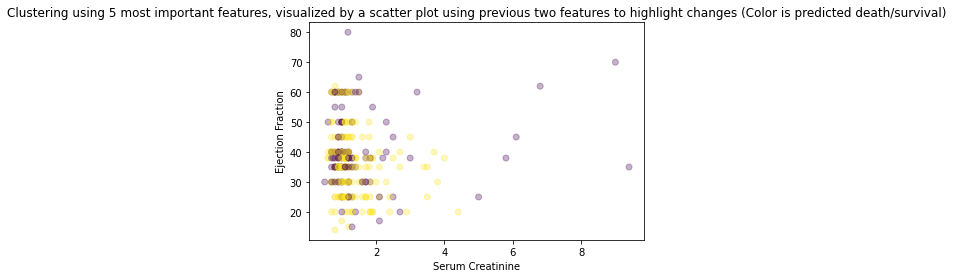

In [19]:
Z = data[["serum_creatinine","ejection_fraction","age","creatinine_phosphokinase","sex"]]
gmm5 = GaussianMixture(n_components = 2, n_init=200)
gmm5.fit(Z)
labels5 = gmm5.predict(Z)
print("Converged:",gmm5.converged_,"; after ",gmm5.n_iter_,"iterations.")
Z["labels5"] = labels5
data["labels5"] = labels5
Z0 = Z[Z["labels5"] == 0]
Z1 = Z[Z["labels5"] == 1]
Z
plt.scatter(Z["serum_creatinine"],Z["ejection_fraction"], c=Z["labels5"], alpha = 0.3)
plt.xlabel("Serum Creatinine")
plt.ylabel("Ejection Fraction")
plt.title("Clustering using 5 most important features, visualized by a scatter plot using previous two features to highlight changes (Color is predicted death/survival)")
plt.show()

In [20]:
#Evaluation
confusion_matrix_5 = confusion_matrix(y_true = data["DEATH_EVENT"], y_pred = data["labels5"])
precision_5 = confusion_matrix_5[1][1]/(confusion_matrix_5[1][1]+confusion_matrix_5[0][1])
accuracy_5 = (confusion_matrix_5[0][0]+confusion_matrix_5[1][1])/confusion_matrix_5.sum()
recall_5 =  confusion_matrix_5[1][1]/(confusion_matrix_5[1][1]+confusion_matrix_5[1][0])
F1_5 = 2*(precision_5 * recall_5)/(precision_5+recall_5)
print("Confusion Matrix:\n",confusion_matrix_5,"\nPrecision:",precision_5, "\nAccuracy: ",accuracy_5, "\nRecall: ", recall_5, "\nF1: ", F1_5)

Confusion Matrix:
 [[ 72 131]
 [ 36  60]] 
Precision: 0.31413612565445026 
Accuracy:  0.4414715719063545 
Recall:  0.625 
F1:  0.4181184668989547


We see that clustering with five features does not improveany metric. Clustering with two features produces better results than with five, suggesting that the additional three features just increase noise. 

# Clustering with One Feature only

The decision boundary of the first clustering approach is quite vertical, indicating that the y-variable might not even have much influence on the outcome. This idea is adressed in this section, where we cluster according to the most important feature only. 

Converged: True ; after  10 iterations.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


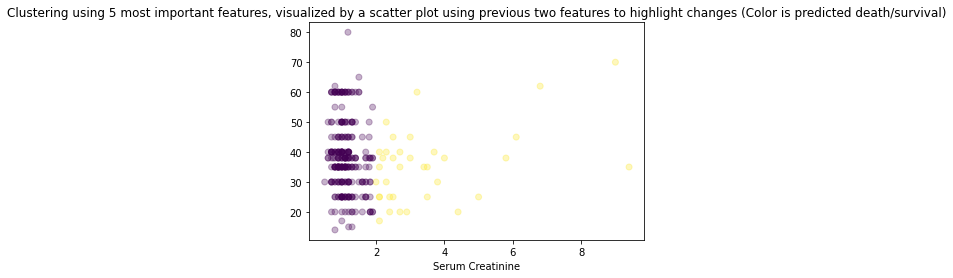

In [21]:
Q = data[["serum_creatinine"]]
gmm1 = GaussianMixture(n_components = 2, n_init=200)
gmm1.fit(Q.values)
labels1 = gmm1.predict(Q)
print("Converged:",gmm1.converged_,"; after ",gmm1.n_iter_,"iterations.")
Q["labels1"] = labels1
data["labels1"] = labels1
Q0 = Q[Q["labels1"] == 0]
Q1 = Q[Q["labels1"] == 1]

plt.scatter(Q["serum_creatinine"], Z["ejection_fraction"],c=Q["labels1"],alpha =0.3)
plt.xlabel("Serum Creatinine")
plt.title("Clustering using 5 most important features, visualized by a scatter plot using previous two features to highlight changes (Color is predicted death/survival)")
plt.show()

In [22]:
#Evaluation
confusion_matrix_1 = confusion_matrix(y_true = data["DEATH_EVENT"], y_pred = data["labels1"])
precision_1 = confusion_matrix_1[1][1]/(confusion_matrix_1[1][1]+confusion_matrix_1[0][1])
accuracy_1 = (confusion_matrix_1[0][0]+confusion_matrix_1[1][1])/confusion_matrix_1.sum()
recall_1 =  confusion_matrix_1[1][1]/(confusion_matrix_1[1][1]+confusion_matrix_1[1][0])
F1_1 = 2*(precision_1 * recall_1)/(precision_1+recall_1)
print("Confusion Matrix:\n",confusion_matrix_1,"\nPrecision:",precision_1, "\nAccuracy: ",accuracy_1, "\nRecall: ", recall_1, "\nF1: ", F1_1)

Confusion Matrix:
 [[190  13]
 [ 74  22]] 
Precision: 0.6285714285714286 
Accuracy:  0.7090301003344481 
Recall:  0.22916666666666666 
F1:  0.33587786259541985


Although Accuracy improved, recall worsened and consequently leads to a bad F1-score. The main feature is apparently not sufficient. 